# 1. Importacion

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Inicializacion de datos

In [ ]:
path = "PFDA_rides.csv"
rides_original = pd.read_csv(f"{path}", sep=",")

pathw = "PFDA_weather.csv"
weather_original = pd.read_csv(f"{pathw}", sep=",")

# 3. Exploracion inicial de los datos

## **Rides**

### a) Exploracion


In [ ]:
rides_original.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,11.0,1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,7.0,1,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,26.0,1,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,9.0,1,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
rides_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  float64
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  int64  
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


- Se tienen 693071 datos en el dataframe rides.
- Existen 10 columnas.
- la columna time_stamp da informacion en fechas pero no esta en este formato por lo que hay que convertirla.

Creo una copia para formatear time_stamp y empezar a aplicar cambios

In [ ]:
rides_exploratorio = rides_original.copy()
rides_exploratorio["time_stamp"] = pd.to_datetime(rides_exploratorio.time_stamp, unit="ms")


### b) Evaluación de calidad de datos

#### Verificar valores duplicados

In [ ]:
print(rides_exploratorio.duplicated().sum())

0


- No exiten valores duplicados en el dataframe rides

#### Verificar valores nulos

In [ ]:
rides_exploratorio.isnull().mean()*100 # porcentaje de valores nulos por columnas

,0
distance,0.000000
cab_type,0.000000
time_stamp,0.000000
destination,0.000000
source,0.000000
price,7.949402
surge_multiplier,0.000000
id,0.000000
product_id,0.000000
name,0.000000


- La columna precio tiene aproximadamente un 8% de valores nulos y además es una varible importante para el análisis, por lo cual podriamos imputar datos para trabajar sin la necidad de eliminar la columna

In [ ]:
rides_exploratorio.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,693071,637976.000000,693071.000000
mean,2.189430,2018-12-05 21:35:09.213053184,16.545125,1.014287
min,0.020000,2018-11-26 02:40:00,2.500000,1.000000
25%,1.280000,2018-11-28 21:20:00,9.000000,1.000000
50%,2.160000,2018-12-02 08:40:00,13.500000,1.000000
75%,2.920000,2018-12-14 23:26:40,22.500000,1.000000
max,7.860000,2018-12-18 19:06:40,97.500000,3.000000
std,1.138937,NaN,9.324359,0.118818


- distance: La mayoría de los viajes son cortos. El promedio está en 2.19 km y la mitad de los trayectos no supera los 2.16 km. Esto sugiere que los viajes suelen ser breves y bastante consistentes.
- price: El precio promedio es de $ 16.54, pero la mitad de los viajes cuestan menos de 13.50. Esto indica que hay algunos viajes más caros que elevan el promedio, lo que podría ser por trayectos largos o tarifas dinámicas.
- surge_multiplier: En general, los viajes no tienen tarifa dinámica. El valor más común es 1.0, y aunque hay multiplicadores de hasta 3.0, parecen casos poco frecuentes.
- time_stamp: La mayoría de los viajes ocurrieron entre el 26 de noviembre y el 2 de diciembre de 2018, lo que sugiere mayor actividad en la primera mitad del período y posibles patrones diarios o semanales por explorar.



### c) Análisis de distribución de variables




#### **Exploración de distancias**

In [ ]:
rides_exploratorio.distance.describe()

,distance
count,693071.000000
mean,2.189430
std,1.138937
min,0.020000
25%,1.280000
50%,2.160000
75%,2.920000
max,7.860000


Inspecciono valores únicos y su frecuencia

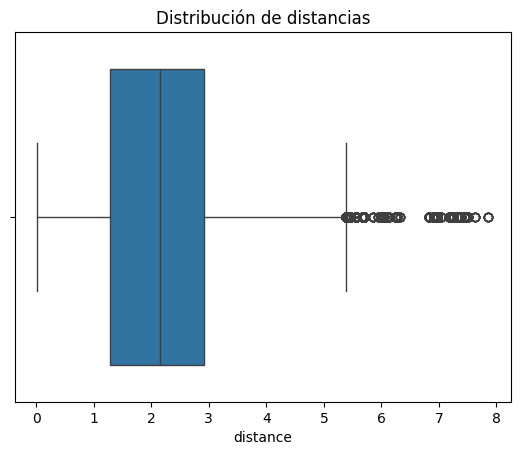

In [ ]:
sns.boxplot(x=rides_exploratorio["distance"])
plt.title("Distribución de distancias")
plt.show()

- La mayoría de los viajes están entre 1 y 3 km.
- La mediana esta en unos 2 km.
- Hay algunos viajes más largos, por encima de 5 km, que son poco comunes, denota outliers.
- La distribución es bastante equilibrada, sin un sesgo marcado.


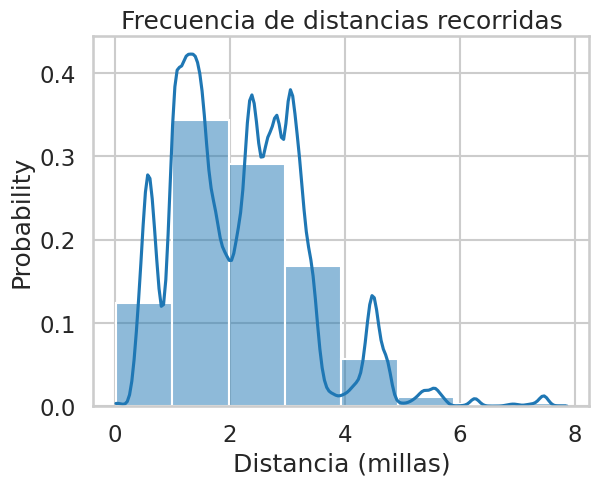

In [ ]:
sns.histplot(rides_exploratorio["distance"], bins=8, kde=True,stat="probability")
plt.title("Frecuencia de distancias recorridas")
plt.xlabel("Distancia (millas)")
plt.show()


- La mayor parte de los viajes se concentran entre 1 y 3 km, con un pico claro cercano a los 2 millas.
- A medida que la distancia aumenta, la frecuencia baja rápidamente: luego de los 4 millas los trayectos son mucho menos comunes.
- La forma de la distribución confirma lo que se identifico en el boxplot: predominan los viajes cortos, y los trayectos largos son casos aislados (outliers).


#### **Exploración de precios**

In [ ]:
rides_exploratorio.price.describe()

,price
count,637976.000000
mean,16.545125
std,9.324359
min,2.500000
25%,9.000000
50%,13.500000
75%,22.500000
max,97.500000


Inspeccionar valores únicos y su frecuencia


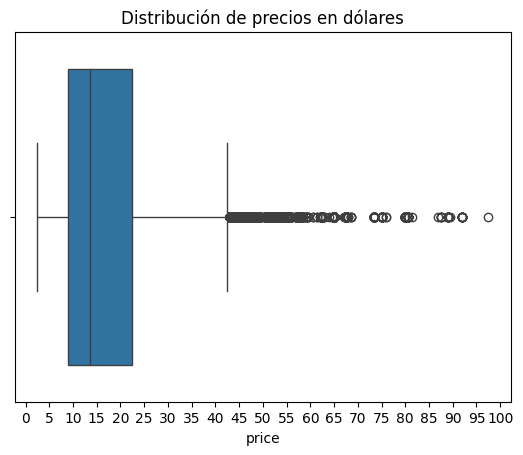

In [ ]:
sns.boxplot(x=rides_exploratorio["price"])
plt.xticks(np.arange(0, 101, 5))
plt.title("Distribución de precios en dólares")
plt.show()


- La mayoría de los viajes cuestan entre 9 y 22.5. (esto me lo dice el rango intercuartil)
- El precio típico está en 13.5, que corresponde a la mediana.
- Hay valores extremos que llegan hasta casi 100, poco frecuentes pero que elevan el promedio.
- La diferencia entre la mediana y el promedio confirma que la distribución está sesgada hacia la derecha, esiten viajes muy caros los cuales influyen en el promedio.


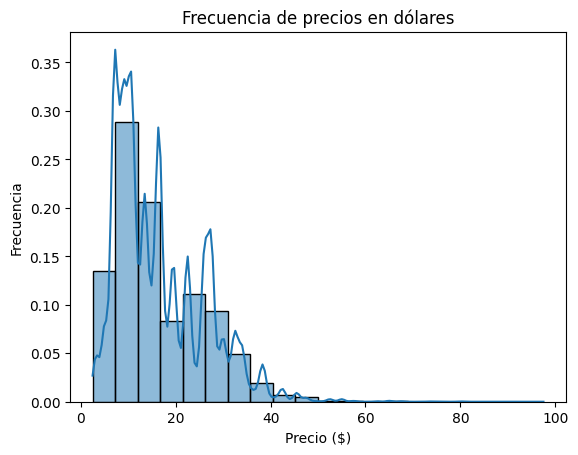

In [ ]:
sns.histplot(rides_exploratorio["price"], bins=20, kde=True,stat="probability")
plt.title("Frecuencia de precios en dólares")
plt.ylabel("Frecuencia")
plt.xlabel("Precio ($)")
plt.show()


- La mayor parte de los viajes tienen precios bajos, concentrados entre 0 y 20 dólares.
- El pico más alto está alrededor de los 10–15 dólares, lo que coincide con la mediana que vimos en el boxplot.
- A medida que el precio aumenta, la frecuencia cae rápidamente (los viajes más caros son poco comunes).
- La curva suavizada confirma que la distribución está sesgada hacia la derecha, con una cola larga de precios altos que aparecen como outliers.


- Esta informacion es clave ya que al imputar los datos

### Correlacion entre precio y distancia

# Primero se hara una correlacion sin considerar los valores nulos de precios

In [ ]:
prueba1=rides_exploratorio.dropna()

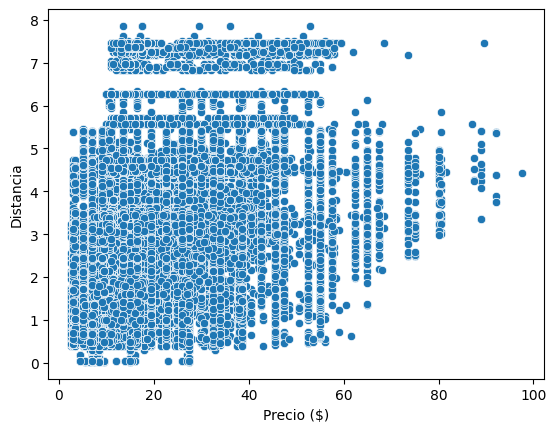

In [ ]:
sns.scatterplot(data=prueba1, x='price',y='distance')
plt.ylabel("Distancia")
plt.xlabel("Precio ($)")
plt.show()

In [ ]:
correlacion = prueba1["price"].corr(prueba1["distance"])
print(f"Correlación entre precio y distancia: {correlacion:.4f}")


Correlación entre precio y distancia: 0.3451


- La correlacion es baja por lo cual podemos imputar los valores faltantes de precio usando el promedio general

In [ ]:
mean_price = rides_exploratorio["price"].mean()
rides_exploratorio['price'].fillna(mean_price,inplace=True)

/tmp/ipython-input-618459750.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rides_exploratorio['price'].fillna(mean_price,inplace=True)


## **Weather**

### a) Exploracion


In [ ]:
weather_original.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [ ]:
weather_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


- Se tienen 6276 datos en el dataframe rides.
- Existen 8 columnas.
- la columna time_stamp da informacion en fechas pero no esta en este formato por lo que hay que convertirla.

Creo una copia para formatear time_stamp y empezar a aplicar cambios

In [ ]:
weather_exploratorio = weather_original.copy()
weather_exploratorio["time_stamp"] = pd.to_datetime(weather_original.time_stamp, unit="s")


Además una nueva columna con las temperaturas en grados Celsius ya que originalmente estan en grados Fahrenheit.

In [ ]:
weather_exploratorio["temp_c"] = (weather_exploratorio["temp"] - 32) * 5/9

### b) Evaluación de calidad de datos

#### Verificar valores duplicados

In [ ]:
print(weather_exploratorio.duplicated().sum())

0


- No exiten valores duplicados en el dataframe weather

#### Verificar valores nulos

In [ ]:
weather_exploratorio.isnull().mean()*100 # porcentaje de valores nulos por columnas

,0
temp,0.000000
location,0.000000
clouds,0.000000
pressure,0.000000
rain,85.755258
time_stamp,0.000000
humidity,0.000000
wind,0.000000
temp_c,0.000000


- La columna rain tiene aproximadamente un 86% de valores nulos, por lo cual se penso en eliminar la columna ya que no nos aportaria mucho con sus datos disponibles.  

- Sin embargo se considero que aquellos valores nulos pueden deberse a que no habia lluvia por los cual se conservara la columna imputando los NaN con el valor de 0 (no hay lluvia)

In [ ]:
weather_exploratorio.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind,temp_c
count,6276.000000,6276.000000,6276.000000,894.000000,6276,6276.000000,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,2018-12-03 17:16:17.146430720,0.763985,6.802812,3.939153
min,19.620000,0.000000,988.250000,0.000200,2018-11-26 03:40:44,0.450000,0.290000,-6.877778
25%,36.077500,0.440000,997.747500,0.004900,2018-11-28 06:34:30,0.670000,3.517500,2.265278
50%,40.130000,0.780000,1007.660000,0.014850,2018-11-29 17:52:54,0.760000,6.570000,4.516667
75%,42.832500,0.970000,1018.480000,0.060925,2018-12-13 08:45:01,0.890000,9.920000,6.018056
max,55.410000,1.000000,1035.120000,0.780700,2018-12-18 18:45:02,0.990000,18.180000,13.005556
std,6.022055,0.314284,12.870775,0.100758,NaN,0.127340,3.633466,3.345586


- A simple vista no se aprecian valores atipicos, la mayoria de valores mantienen un valor cercano entre la mediana y media

- Temperatura (temp): promedio de 39 °F, con una dispersión moderada (std ≈ 6). La diferencia entre el mínimo (19.6 °F) y el máximo (55.4 °F) sugiere variaciones normales dentro del rango climático.
- Nubosidad (clouds): promedio bajo (0.68), con una alta frecuencia de cielos parcialmente despejados.
- Presión (pressure): estable, con media en 1008 hPa y poca variabilidad (std ≈ 12.9), lo que indica condiciones atmosféricas normales.

- Lluvia (rain): datos escasos (solo 894 registros), con una media muy baja (0.057 mm), lo que sugiere precipitaciones ligeras o poco frecuentes.
- Humedad (humidity): promedio de 0.76 (76 %), coherente con un clima húmedo moderado y sin valores extremos.
- Viento (wind): velocidad media de 6.8 m/s, mostrando cierta variabilidad (std ≈ 3.6), pero dentro de rangos habituales.
- La columna temp_c guarda relación con respecto a temp ya que es solo una conversión de los mismos valores.




In [ ]:
indicadores=weather_exploratorio.loc[:,['clouds','rain','humidity']] #estan en la misma escala

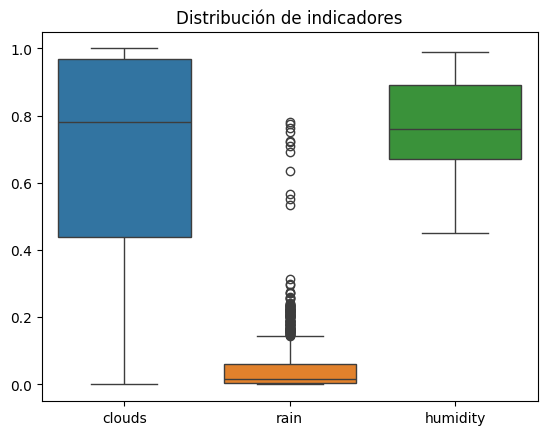

In [ ]:
sns.boxplot(indicadores)
plt.title("Distribución de indicadores")
plt.show()

- rain .- Se confirma que los datos de lluvia tienen un valor mayor a 0 como valor minimo, por lo cual si seria factible imputar como 0 aquellos nulos.   
Sin embargo el 75% de los datos no llegan ni a 0.1 es decir la gran mayoria tiende a 0, por lo cual la columna en general no aportaria mayor informacion al analisis y se decide eliminar la columna.

In [ ]:
weather_exploratorio.dropna(axis=1,inplace=True)

### c) Análisis de distribución de variables




#### **Exploración de temperatura**

In [ ]:
weather_exploratorio.temp.describe()

,temp
count,6276.000000
mean,39.090475
std,6.022055
min,19.620000
25%,36.077500
50%,40.130000
75%,42.832500
max,55.410000


In [ ]:
weather_exploratorio.temp_c.describe()

,temp_c
count,6276.000000
mean,3.939153
std,3.345586
min,-6.877778
25%,2.265278
50%,4.516667
75%,6.018056
max,13.005556


Inspecciono valores únicos y su frecuencia

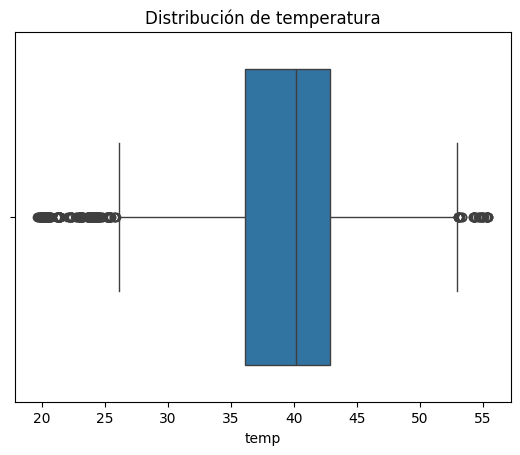

In [ ]:
sns.boxplot(x=weather_exploratorio["temp"])
plt.title("Distribución de temperatura")
plt.show()

- La mayoría de los días están entre 36°F y 43°F.
- La mediana esta en unos 40°F .
- Hay algunos dias con temperatura por encima de 50°F, que son poco comunes, denota outliers.
- Hay algunos dias con temperatura por debajo de 26°F, que son poco comunes, denota outliers.


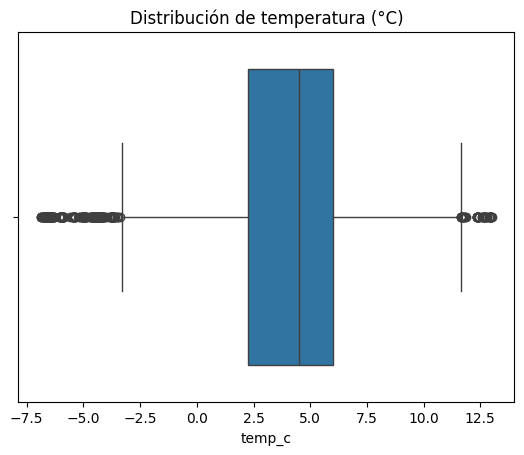

In [ ]:
sns.boxplot(x=weather_exploratorio["temp_c"])
plt.title("Distribución de temperatura (°C)")
plt.show()

- Boxplot de weather_exploratorio convertido a grados Celsius

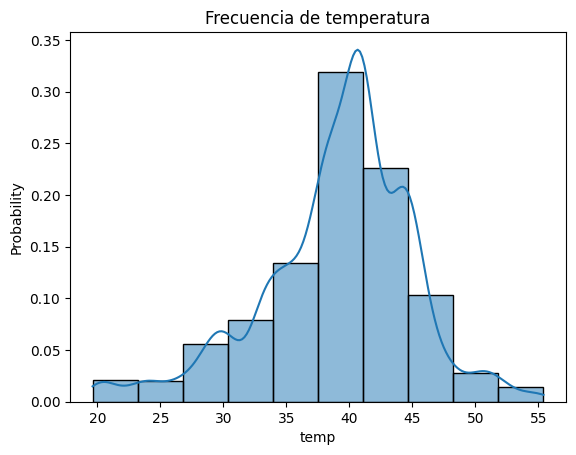

In [ ]:
sns.histplot(weather_exploratorio["temp"], bins=10, kde=True, stat="probability")
plt.title("Frecuencia de temperatura")
plt.show()


- La curva KDE muestra una distribución asimétrica, con una ligera cola hacia temperaturas más altas.

- Esta información es útil para entender el contexto climático en el que se realizaron los viajes y evaluar si existe alguna relación con la demanda de transporte.

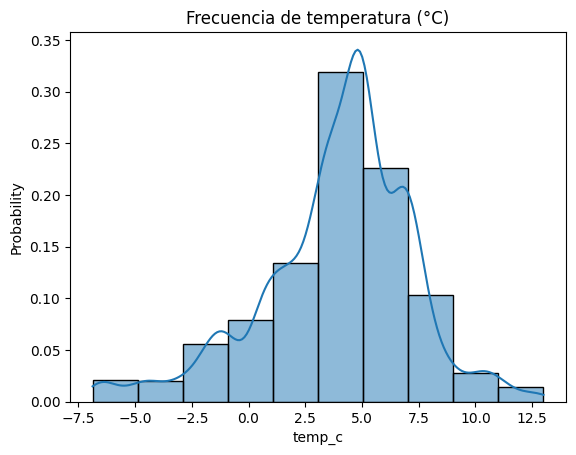

In [ ]:
sns.histplot(weather_exploratorio["temp_c"], bins=10, kde=True, stat="probability")
plt.title("Frecuencia de temperatura (°C)")
plt.show()

- Histplot de weather_exploratorio convertido a grados Celsius

#### **Exploración de Humedad**

In [ ]:
weather_exploratorio.humidity.describe()

,humidity
count,6276.000000
mean,0.763985
std,0.127340
min,0.450000
25%,0.670000
50%,0.760000
75%,0.890000
max,0.990000


- La media es 0.76 y la mediana también está cerca (0.76), lo que indica una distribución bastante simétrica.

- El rango va de 0.45 a 0.99, lo cual es normal para un índice de humedad (que suele estar entre 0 y 1).

- El 25% de los datos están por debajo de 0.67 y el 75% por debajo de 0.89, lo que indica que la mayoría de los valores están en un rango medio-alto.

Inspeccionar valores únicos y su frecuencia


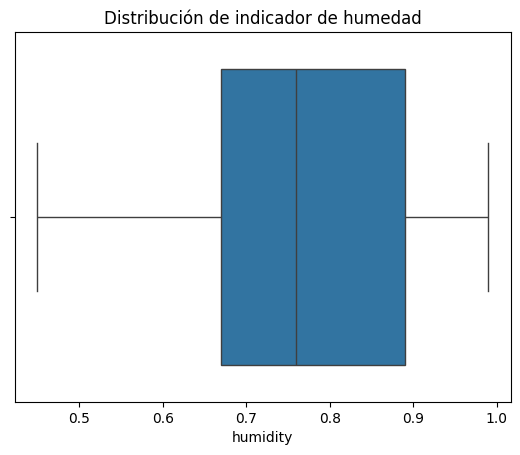

In [ ]:
sns.boxplot(x=weather_exploratorio['humidity'])
plt.title("Distribución de indicador de humedad")
plt.show()


- La mayoría de datos esta entre 0.67 y 0.9
- La mediana es de 0.76, es decir esta un poco sesgada hacia la derecha.
- Hay valores muy bajos que alargan el bigote inferior pero sigue estando dentro del rango intercuartil.
- No hay valores atipicos


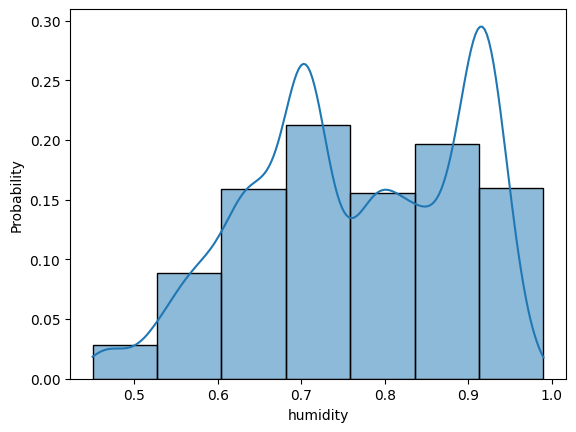

In [ ]:
sns.histplot(weather_exploratorio['humidity'], bins=7, kde=True,stat="probability")
plt.show()


- El pico de densidad está cerca de 0.75–0.8, lo que coincide con la media de 0.76
- La mayoría de los registros se concentran entre 0.65 y 0.9, lo que indica un clima predominantemente húmedo.

### Correlacion entre temperatura y humedad

<Axes: xlabel='humidity', ylabel='temp'>

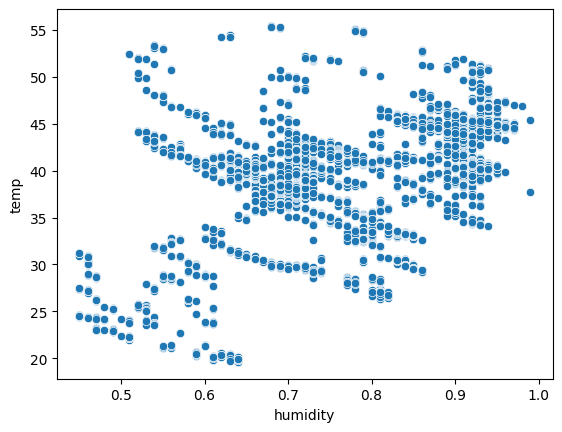

In [ ]:
sns.scatterplot(data=weather_exploratorio, x='humidity',y='temp')

<Axes: xlabel='humidity', ylabel='temp_c'>

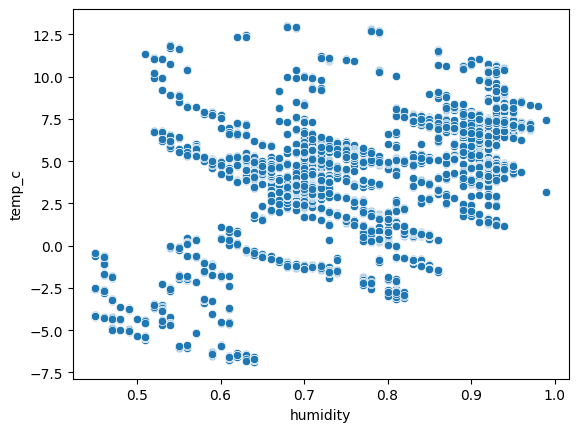

In [ ]:
sns.scatterplot(data=weather_exploratorio, x='humidity', y='temp_c')

In [ ]:
correlacion = weather_exploratorio["temp_c"].corr(weather_exploratorio["humidity"])
print(f"Correlación entre temperatura y humedad: {correlacion:.4f}")

Correlación entre temperatura y humedad: 0.3873


- La mayoría de los puntos están concentrados en el rango medio de humedad (0.65–0.9) y temperaturas entre 35 °F y 45 °F.
- No hay una pendiente clara ni una distribución diagonal que indique que al aumentar la humedad la temperatura baja o sube de forma consistente.
- Aunque el coeficiente de correlación indica una relación positiva débil, no se observa una dependencia visual fuerte entre ambas variables.

# Preguntas de Analisis

## ¿Cual es el dia con mayor viajes ?, ¿Cual es la app mas usada?

In [ ]:
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
rides_exploratorio['dia_semana'] = rides_exploratorio.time_stamp.dt.weekday.map(lambda x: dias[x])

In [ ]:
plataforma_dia=rides_exploratorio.groupby(['cab_type','dia_semana']).agg(
    cantidad_viajes=('cab_type', 'count'),
    precio_promedio=('price', 'mean'),
    distancia_promedio=('distance', 'mean')).reset_index()

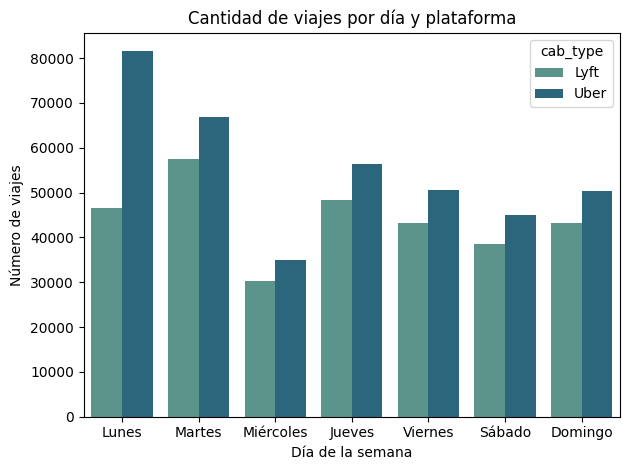

In [ ]:
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
sns.countplot(data=rides_exploratorio.sort_values(by='dia_semana'),x='dia_semana',hue='cab_type', order=orden_dias, palette="crest")
plt.title('Cantidad de viajes por día y plataforma')
plt.xlabel('Día de la semana')
plt.ylabel('Número de viajes')
plt.tight_layout()

# ¿ Influye el clima en la cantidad de viajes?
tienen el mismo rango de fechas asi podemos agrupar por fechas unirlos usando merge

In [ ]:
rides_exploratorio['fecha']=rides_exploratorio.time_stamp.dt.date
dfr=rides_exploratorio.groupby('fecha')['fecha'].count().reset_index(name='cantidad_viajes')

weather_exploratorio['fecha']=rides_exploratorio.time_stamp.dt.date
dfw=weather_exploratorio.groupby('fecha').agg(
    temperatura_promedio=('temp_c','mean'),
    humedad_promedio=('humidity', 'mean'),
    nubosidad_promedio=('clouds','mean')).reset_index()

In [ ]:
union_por_fechas=dfr.merge(dfw,on='fecha')

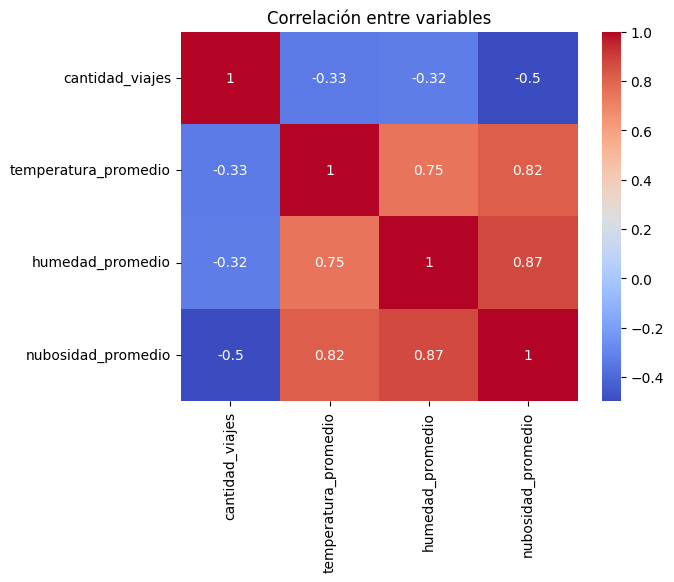

In [ ]:
sns.heatmap(union_por_fechas.drop(columns=["fecha"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()


- Se puede observar que en promedio por dia la nubusidad tiene una correlacion fuerte positiva con la temperatura y la humedad, asi mismo tiene una correlacion negativa con la cantidad de viajes.
- Se podria concluir que los dias que el cielo esta mas despejado, hay mayor cantidad de viajes.

In [ ]:
plataforma_fecha = (
    rides_exploratorio
    .groupby(['cab_type','fecha'])['fecha']
    .count()
    .reset_index(name='cantidad_viajes'))

/tmp/ipython-input-2465640887.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45)
/tmp/ipython-input-2465640887.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45)
/tmp/ipython-input-2465640887.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45)
/tmp/ipython-input-2465640887.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45)


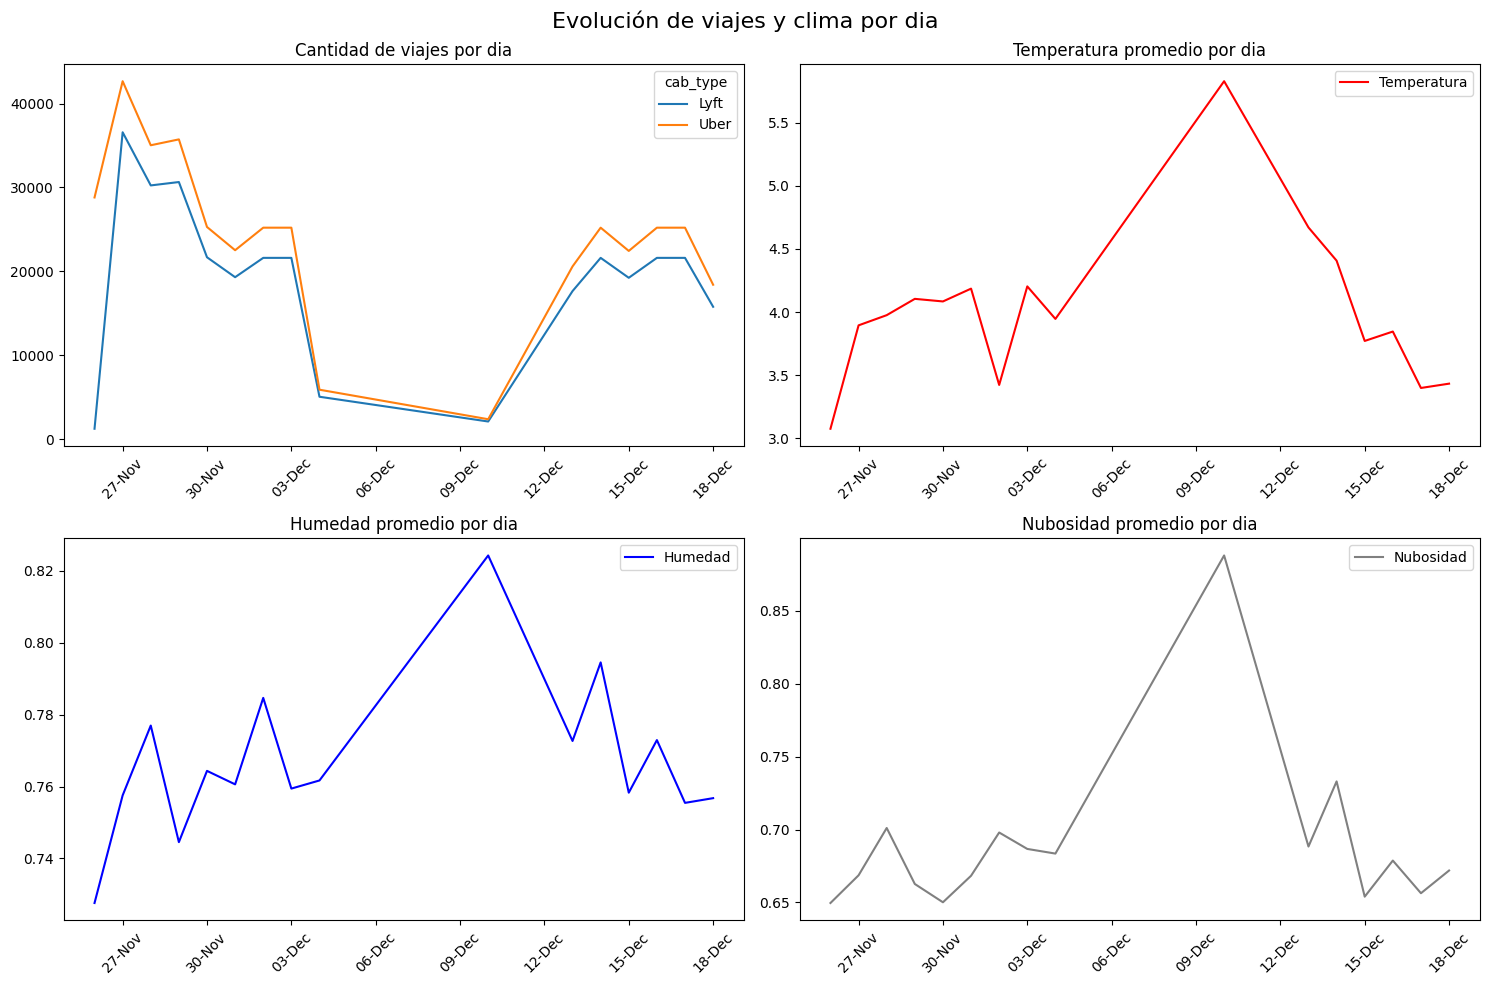

In [ ]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Cantidad de viajes
sns.lineplot(data=plataforma_fecha, x="fecha", y="cantidad_viajes",hue="cab_type",
             color='red', ax=axs[0, 0])
axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
axs[0, 0].xaxis.set_major_locator(mdates.DayLocator(interval=3))
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45)
axs[0, 0].set_title("Cantidad de viajes por dia")
axs[0, 0].set_xlabel("")
axs[0, 0].set_ylabel("")

# Gráfico 2: Temperatura
sns.lineplot(data=union_por_fechas, x="fecha", y="temperatura_promedio",
             label="Temperatura", color='red', ax=axs[0, 1])
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
axs[0, 1].xaxis.set_major_locator(mdates.DayLocator(interval=3))
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45)
axs[0, 1].set_title("Temperatura promedio por dia")
axs[0, 1].set_xlabel("")
axs[0, 1].set_ylabel("")

# Gráfico 3: Humedad
sns.lineplot(data=union_por_fechas, x="fecha", y="humedad_promedio",
             label="Humedad", color='blue', ax=axs[1, 0])
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
axs[1, 0].xaxis.set_major_locator(mdates.DayLocator(interval=3))
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45)
axs[1, 0].set_title("Humedad promedio por dia")
axs[1, 0].set_xlabel("")
axs[1, 0].set_ylabel("")

# Gráfico 4: Nubosidad
sns.lineplot(data=union_por_fechas, x="fecha", y="nubosidad_promedio",
             label="Nubosidad", color='gray', ax=axs[1, 1])
axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
axs[1, 1].xaxis.set_major_locator(mdates.DayLocator(interval=3))
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45)
axs[1, 1].set_title("Nubosidad promedio por dia")
axs[1, 1].set_xlabel("")
axs[1, 1].set_ylabel("")

# Título general
fig.suptitle("Evolución de viajes y clima por dia", fontsize=16)

plt.tight_layout()
plt.show()


- En estas lineas de tiempo se puede apreciar un compartamiento similar en la cantidad de viajes en uber y lyft, teniendo Uber una mayor cantidad.  

- Se reafirma la relacion positiva entre las condiciones climaticas y la relacion negativa con la cantidad de viajes   

- Por lo tanto se puede concluir que el clima si influje en la cantidad de viajes. Los dias con temperatura, humedad y nubosidad mas baja suelen tener mayor cantidad de viajes que los dias adversos.

## ¿Cuál es el precio promedio del servicio y cuál es el nivel de riesgo de volatilidad asociado a ese precio?"

In [ ]:
rides_exploratorio["filtro_distancia"] = pd.qcut(
    rides_exploratorio.distance,
    q=3,
    labels=["Corta ", "Media ", "Larga "]
)
comparativa_plus = rides_exploratorio.groupby( ["cab_type", "filtro_distancia"]).agg(
    Precio_Promedio=('price', 'mean'),
    Surge_Promedio=('surge_multiplier', 'mean'),
    Total_Viajes=('id', 'count')
).reset_index()

/tmp/ipython-input-121407997.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comparativa_plus = rides_exploratorio.groupby( ["cab_type", "filtro_distancia"]).agg(


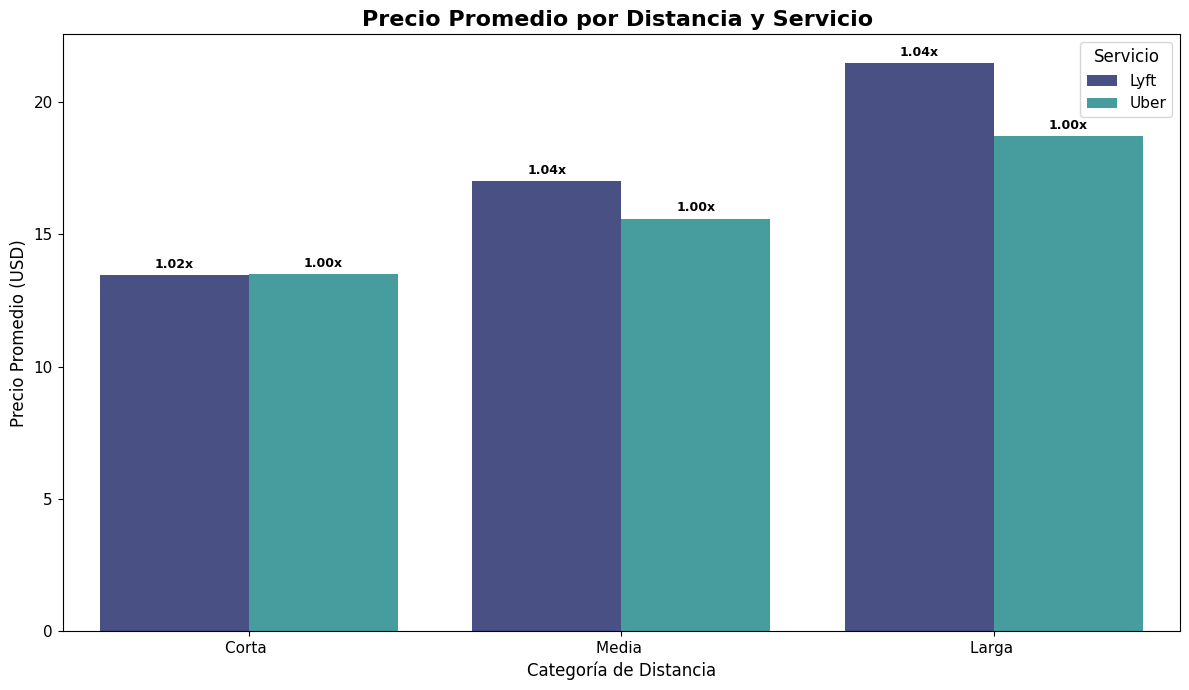

In [ ]:

surge_labels = comparativa_plus['Surge_Promedio'].apply(lambda x: f'{x:.2f}x').tolist()

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=comparativa_plus, x="filtro_distancia", y ="Precio_Promedio", hue="cab_type", palette="mako")
num_distancias = len(rides_exploratorio["filtro_distancia"].unique())
labels_lyft = surge_labels[:num_distancias]
labels_uber = surge_labels[num_distancias:]

ax.bar_label(ax.containers[0], labels=labels_lyft, label_type='edge', padding=3, fontsize=9, fontweight='bold', color='black')
ax.bar_label(ax.containers[1], labels=labels_uber, label_type='edge', padding=3, fontsize=9, fontweight='bold', color='black')
plt.title("Precio Promedio por Distancia y Servicio ", fontsize=16, fontweight='bold')
plt.xlabel("Categoría de Distancia", fontsize=12)
plt.ylabel("Precio Promedio (USD)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Servicio", title_fontsize=12, fontsize=11)
plt.tight_layout()
plt.show()


- En los viajes cortos, ambos servicios tienen precios muy similares.
- Esta diferencia de precios se vuelve más evidente en los viajes de distancia media y los viajes largos.  
- Prima de Precio Consistente y mayor riesgo de volatilidad.
- Posicionamiento de Competencia.

In [ ]:
rangos_distancia = rides_exploratorio['distance'].quantile([0, 1/3, 2/3, 1]).round(2).tolist()

print("\n--- Rangos de Distancia ---")
print(f"1. **Corta:** {rangos_distancia[0]} - {rangos_distancia[1]} millas")
print(f"2. **Media:** {rangos_distancia[1]} - {rangos_distancia[2]} millas")
print(f"3. **Larga:** {rangos_distancia[2]} - {rangos_distancia[3]} millas")



--- Rangos de Distancia ---
1. **Corta:** 0.02 - 1.48 millas
2. **Media:** 1.48 - 2.66 millas
3. **Larga:** 2.66 - 7.86 millas


## ¿Qué plataforma de transporte logra mantener mayor volumen de viajes en días nublados frente a días soleados?

In [ ]:
# Calcular nubosidad promedio por fecha
nubosidad_diaria = weather_exploratorio.groupby('fecha')['clouds'].mean().reset_index()
# Clasificar cada día como 'Soleado' o 'Nublado' según el umbral 0.70
nubosidad_diaria['clima'] = nubosidad_diaria['clouds'].apply(lambda x: 'Nublado' if x > 0.70 else 'Soleado')
# Contar viajes por fecha y plataforma
viajes_por_fecha = rides_exploratorio.groupby(['fecha','cab_type']).size().reset_index(name='cantidad_viajes')
# Unir la clasificación climática con los datos de viajes
union_clima_viajes = viajes_por_fecha.merge(nubosidad_diaria[['fecha','clima']], on='fecha')

/tmp/ipython-input-2127424160.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  anotaciones = tabla_heatmap.applymap(lambda x: f'{x:.1f}%')


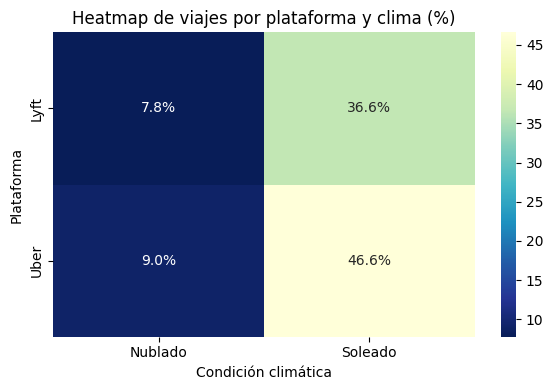

In [ ]:
# Agrupar por plataforma y clima
tabla_clima = union_clima_viajes.groupby(['cab_type', 'clima'])['cantidad_viajes'].sum().reset_index()
# Calcular porcentaje sobre el total general
tabla_clima['porcentaje'] = tabla_clima['cantidad_viajes'] / tabla_clima['cantidad_viajes'].sum() * 100
# Pivotear para crear el heatmap
tabla_heatmap = tabla_clima.pivot(index='cab_type', columns='clima', values='porcentaje')
# Crear tabla de anotaciones con símbolo %
anotaciones = tabla_heatmap.applymap(lambda x: f'{x:.1f}%')
# Graficar heatmap con anotaciones personalizadas
plt.figure(figsize=(6, 4))
sns.heatmap(tabla_heatmap, annot=anotaciones, fmt='', cmap='YlGnBu_r')
plt.title("Heatmap de viajes por plataforma y clima (%)")
plt.xlabel("Condición climática")
plt.ylabel("Plataforma")
plt.tight_layout()
plt.show()

- Uber y Lyft tienen muchos más viajes en días soleados que en nublados.

- Uber mantiene una ventaja en ambas condiciones, pero la diferencia se reduce en días nublados.

- El color amarillo indica mayor volumen (días soleados), mientras que el azul representa menor actividad (días nublados).



Cómo interactúan clima, hora del día y tipo de servicio en el precio?

In [ ]:
rides_exploratorio["time_stamp"] = pd.to_datetime(rides_exploratorio["time_stamp"], unit="ms")

weather_exploratorio["time_stamp"] = pd.to_datetime(weather_exploratorio["time_stamp"])

In [ ]:
rides_exploratorio = rides_exploratorio.sort_values("time_stamp")
weather_exploratorio = weather_exploratorio.sort_values("time_stamp")

In [ ]:
df = pd.merge_asof(
    rides_exploratorio,
    weather_exploratorio[["time_stamp", "temp_c"]],
    on="time_stamp",
    direction="nearest",
    tolerance=pd.Timedelta("30m")
)


In [ ]:
df = df.dropna(subset=["temp_c"])

In [ ]:
df["hour"] = df["time_stamp"].dt.hour

In [ ]:
df["cab_type"] = df["cab_type"].astype(str)

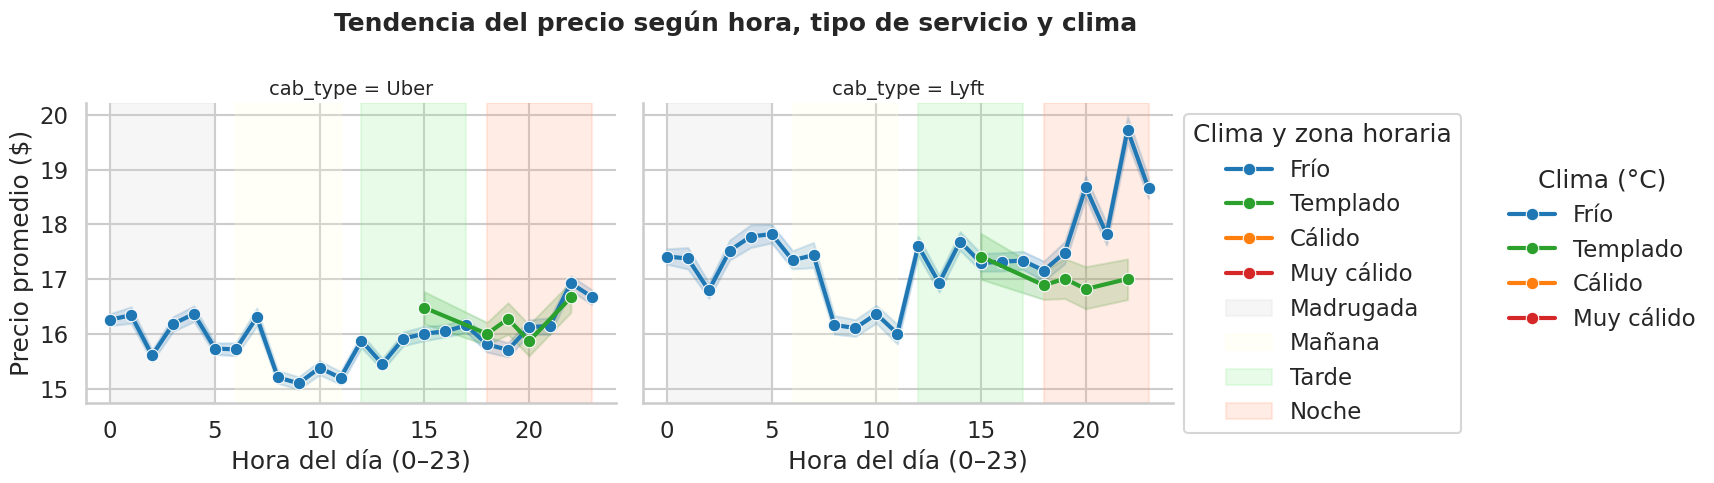

In [ ]:
df["temp_range"] = pd.cut(
    df["temp_c"],
    bins=[-10, 10, 20, 30, 50],
    labels=["Frío", "Templado", "Cálido", "Muy cálido"]
)


paleta_temp = {"Frío": "#1f77b4", "Templado": "#2ca02c", "Cálido": "#ff7f0e", "Muy cálido": "#d62728"}


sns.set_style("whitegrid")
sns.set_context("talk")


g = sns.FacetGrid(df, col="cab_type", height=5, aspect=1.3, sharey=True, margin_titles=True)
g.map_dataframe(sns.lineplot, x="hour", y="price", hue="temp_range", palette=paleta_temp, linewidth=3, marker="o")


g.add_legend(title="Clima (°C)", bbox_to_anchor=(1, 0.5), loc='center left')
g.set_axis_labels("Hora del día (0–23)", "Precio promedio ($)")
g.set_titles("{col_name}", size=14)


for ax in g.axes.flat:
    ax.axvspan(0, 5, color="lightgray", alpha=0.2, label="Madrugada")
    ax.axvspan(6, 11, color="lightyellow", alpha=0.2, label="Mañana")
    ax.axvspan(12, 17, color="lightgreen", alpha=0.2, label="Tarde")
    ax.axvspan(18, 23, color="lightsalmon", alpha=0.2, label="Noche")


handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Clima y zona horaria", bbox_to_anchor=(1, 1))

plt.subplots_adjust(top=0.85)
plt.suptitle("Tendencia del precio según hora, tipo de servicio y clima", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


La hora del día es el factor que más influye en el precio.
Lyft es más caro y más variable que Uber.
El clima frío eleva las tarifas, sobre todo en Lyft.